# Feature Analysis
- In this notebook, we aim to find patterns in QB performance.
- We look at the distribution of the data, as well as descriptive statistics and correlations.
- Data from 2006-2021 (16 seasons) will be used.
- The 2022 data (with 2023 target) will not be included, as these rows will be used as the final holdout test set for the ongoing 2023 season.
- Many of the visualizations in the [presentation](./presentation.pdf) are derived from this notebook.

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for viewing dataframes
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# seaborn theme
sns.set_theme(context='talk', style='whitegrid')

# colors used in slide deck
# light blue, royal blue, turquoise, navy blue, black
chart_colors = ['#00c9ff', '#005bff', '#006d8b', '#1f497d', '#000000']

## Load, clean data

In [2]:
# load the cleaned data
df = pd.read_csv('./train_data/data.csv').drop(['Unnamed: 0'], axis=1)

In [3]:
# 2022 players (test set)
players_2022 = df[df['year'] == 2022]

# drop 2022 rows, as we want to only analyze the training data in this notebook
df = df.drop(players_2022.index)

In [4]:
df.shape, len(set(df.player))

((970, 70), 218)

- 970 seasons of 218 QBs.

# Distribution of Data

### Year

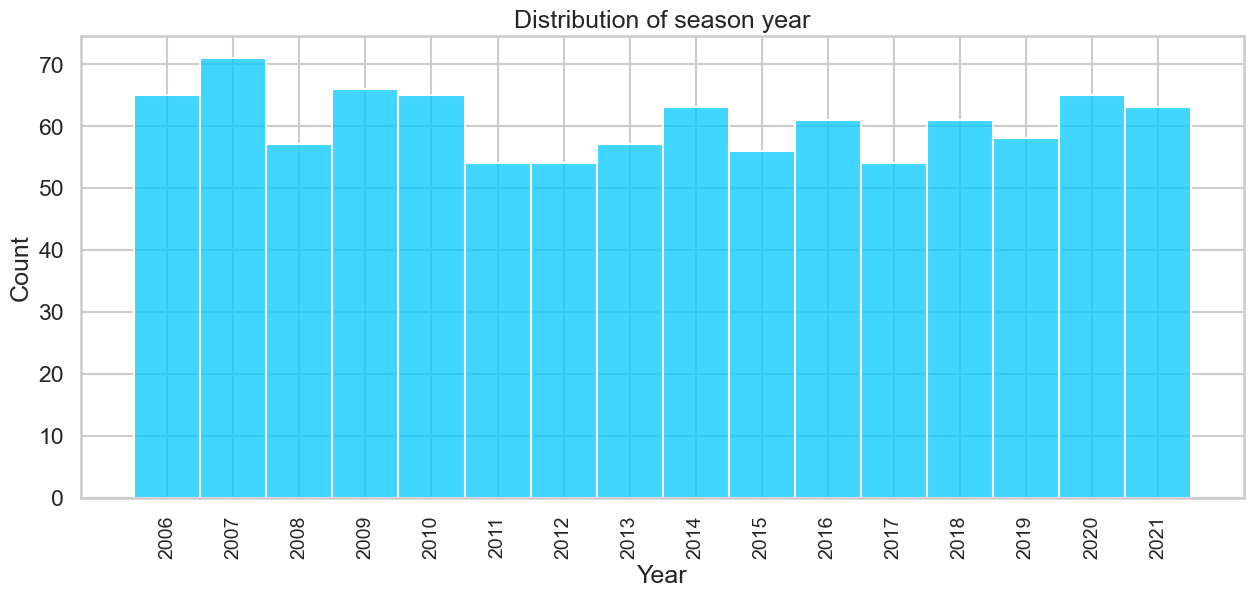

In [5]:
plt.figure(figsize=(15, 6))

# calculate bin edges
unique_values = np.unique(df['year'])
bin_edges = np.linspace(unique_values.min()-0.5, unique_values.max()+0.5, len(unique_values)+1)

# histplot with calculated bin edges
ax = sns.histplot(df, x='year', bins=bin_edges, color=chart_colors[0])

# title and labels
plt.title('Distribution of season year')
plt.xlabel('Year')

# set x-ticks at the center of each bin
ax.set_xticks((bin_edges[:-1] + bin_edges[1:]) / 2)

# x-ticks
ax.set_xticklabels(labels=unique_values, rotation=90, fontdict={'fontsize': 14});

- Input data from 2006-2021 with at least 50 observations per season.
- 2022 season with 2023 target is holdout test set.

### Range of experience

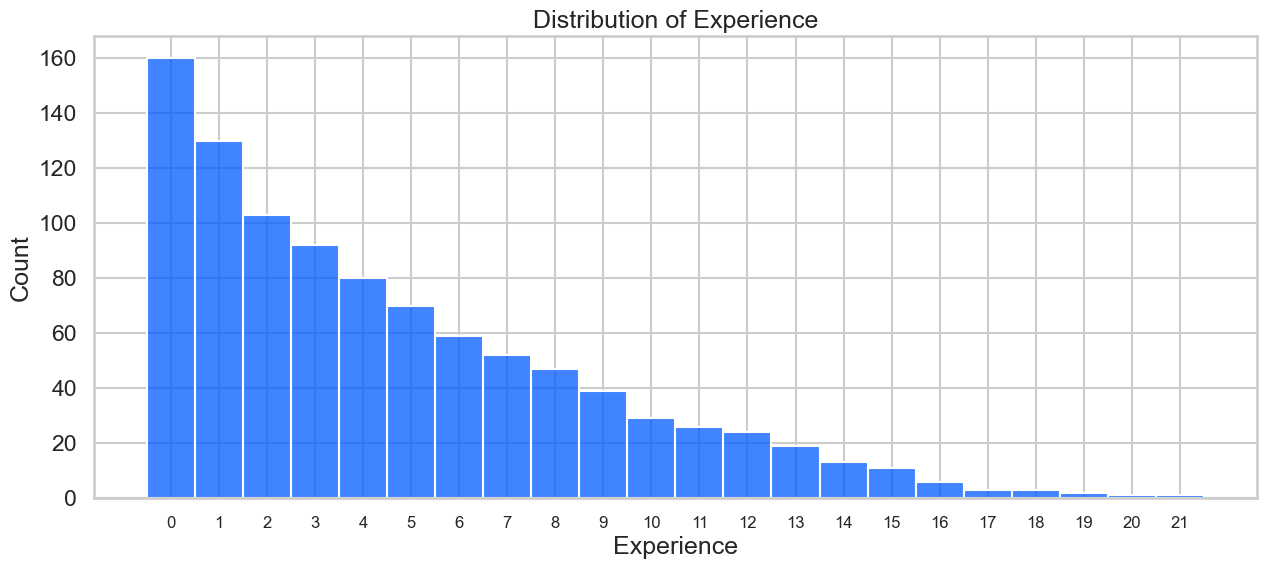

In [6]:
plt.figure(figsize=(15, 6))

# calculate bin edges
unique_values = np.unique(df['exp'])
bin_edges = np.linspace(unique_values.min()-0.5, unique_values.max()+0.5, len(unique_values)+1)

# histplot with calculated bin edges
ax = sns.histplot(df, x='exp', bins=bin_edges, color=chart_colors[1])

# title and labels
plt.title('Distribution of Experience')
plt.xlabel('Experience')

# set x-ticks at the center of each bin
ax.set_xticks((bin_edges[:-1] + bin_edges[1:]) / 2)

# x-ticks
ax.set_xticklabels(labels=unique_values, rotation=0, fontdict={'fontsize': 12});

In [7]:
df[['exp']].describe().T

count      mean       std  min  25%  50%  75%   max
exp  970.0  4.603093  4.232679  0.0  1.0  3.5  7.0  21.0

In [8]:
# players with more than 20 years of experience
df[df['exp'] >= 20]

player team_name  player_game_count  pass_accuracy_percent  \
954  Tom Brady        TB                 16                   75.1   
955  Tom Brady        TB                 17                   76.4   

     pass_aimed_passes  pass_attempts  pass_avg_depth_of_target  \
954                578            610                       9.6   
955                681            719                       8.4   

     pass_avg_time_to_throw  pass_bats  pass_big_time_throws  pass_btt_rate  \
954                    2.41          7                    45            6.9   
955                    2.34         10                    42            5.6   

     pass_completion_percent  pass_completions  pass_def_gen_pressures  \
954                     65.7               401                     155   
955                     67.5               485                     150   

     pass_drop_rate  pass_dropbacks  pass_drops  pass_first_downs  \
954             7.6             636          33               233   
955             6.7             751          35               275   

     pass_grades_hands_fumble  pass_grades_offense  pass_grades_pass  \
954                      91.0                 92.4              91.5   
955                      90.0                 92.0              90.8   

     pass_hit_as_threw  pass_interceptions  pass_passing_snaps  \
954                  4                  12                 680   
955                  1                  12                 781   

     pass_penalties  pass_pressure_to_sack_rate  pass_qb_rating  \
954               4                        13.5           102.2   
955               1                        14.7           102.1   

     pass_sack_percent  pass_sacks  pass_scrambles  pass_spikes  \
954                3.3          21               4            4   
955                2.9          22              10            2   

     pass_thrown_aways  pass_touchdowns  pass_turnover_worthy_plays  \
954                 17               40                          12   
955                 25               43                          15   

     pass_twp_rate  pass_yards  pass_ypa  year  rush_attempts  \
954            1.8        4633       7.6  2020           26.0   
955            1.9        5316       7.4  2021           18.0   

     rush_avoided_tackles  rush_breakaway_attempts  rush_breakaway_percent  \
954                   0.0                      0.0                     0.0   
955                   4.0                      0.0                     0.0   

     rush_breakaway_yards  rush_designed_yards  rush_elu_recv_mtf  \
954                   0.0                 -2.0                0.0   
955                   0.0                  5.0                0.0   

     rush_elu_rush_mtf  rush_elu_yco  rush_elusive_rating  rush_explosive  \
954                0.0           2.0                  0.0             0.0   
955                0.0           3.0                  0.0             4.0   

     rush_first_downs  rush_fumbles  rush_gap_attempts  \
954               6.0           5.0                2.0   
955              14.0           4.0                0.0   

     rush_grades_offense_penalty  rush_grades_run  rush_longest  \
954                         78.6             63.1           4.0   
955                         80.1             77.6          13.0   

     rush_run_plays  rush_scramble_yards  rush_total_touches  rush_touchdowns  \
954           344.0                  8.0                26.0              3.0   
955           356.0                 76.0                18.0              2.0   

     rush_yards  rush_yards_after_contact  rush_yco_attempt  rush_ypa  \
954         6.0                      28.0              0.93       0.2   
955        81.0                      43.0              1.54       2.9   

     rush_zone_attempts  pass_tds_gm  pass_yds_gm  exp  rolling_mean  \
954                 0.0     2.500000   289.562500   20     87.866667   
955                 0.0     2.529412

- We have rookie QBs (exp=0) all the way up to a QB with 21 years of experience.
- The average years of experience for a row in our dataset is 4.6.

### Games played per season

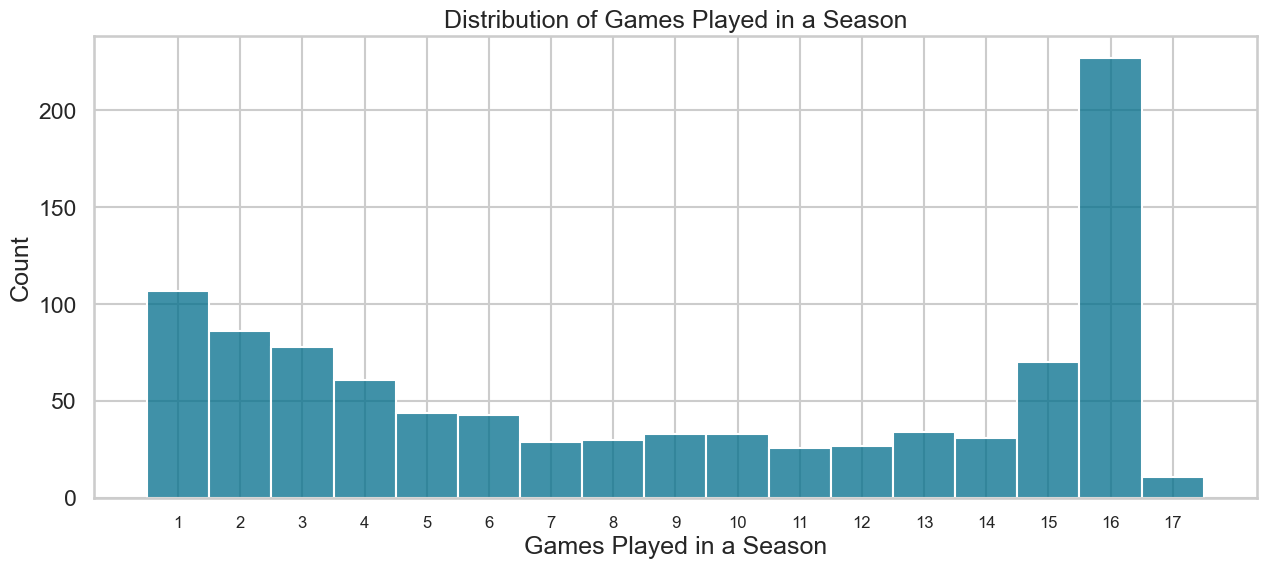

In [9]:
plt.figure(figsize=(15, 6))

# calculate bin edges
unique_values = np.unique(df['player_game_count'])
bin_edges = np.linspace(unique_values.min()-0.5, unique_values.max()+0.5, len(unique_values)+1)

# histplot with calculated bin edges
ax = sns.histplot(df, x='player_game_count', bins=bin_edges, color=chart_colors[2])

# title and labels
plt.title('Distribution of Games Played in a Season')
plt.xlabel('Games Played in a Season')

# set x-ticks at the center of each bin
ax.set_xticks((bin_edges[:-1] + bin_edges[1:]) / 2)

# x-ticks
ax.set_xticklabels(labels=unique_values, rotation=0, fontdict={'fontsize': 12});

In [10]:
df[['player_game_count']].describe().T

count      mean       std  min  25%  50%   75%   max
player_game_count  970.0  8.927835  5.806739  1.0  3.0  9.0  15.0  17.0

- The average QB in our dataset played about 9 games per season.
- Our data includes backup QBs (who maybe only play a couple of games per season) and starters (who play close to 16 games).

### Seasons per player
- Number of seasons per unique player in the dataset 

In [11]:
# store player name: num seasons
seasons_per_player = {}

for key, val in df.groupby('player').groups.items():
    seasons_per_player[key] = len(val)
    
seasons = list(seasons_per_player.values())

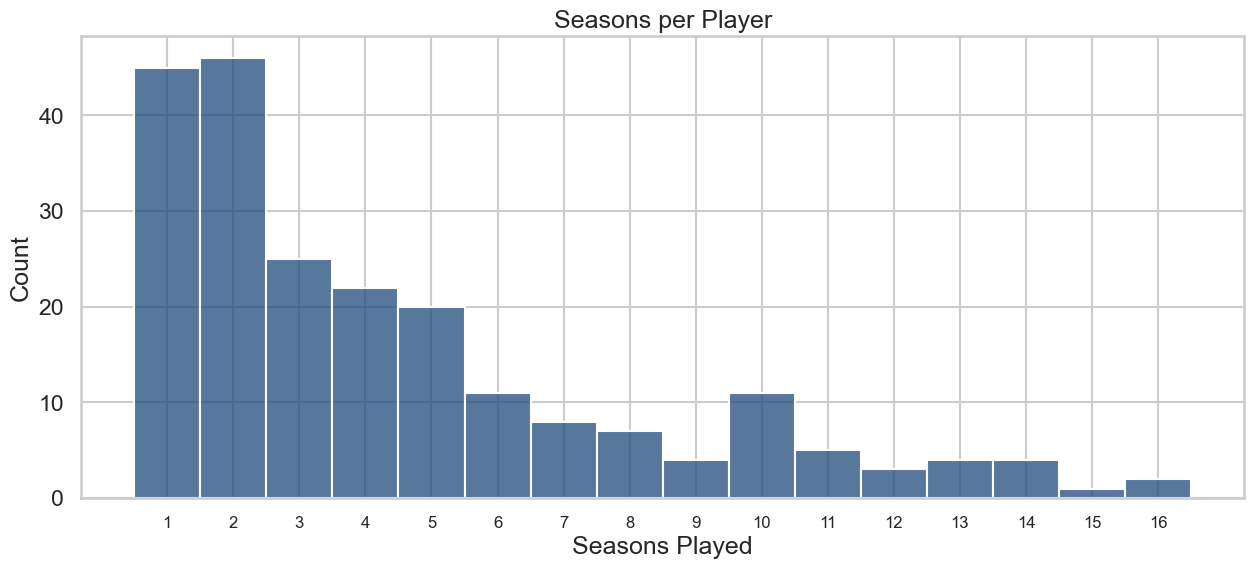

In [12]:
plt.figure(figsize=(15, 6))

# calculate bin edges
unique_values = np.unique(seasons)
bin_edges = np.linspace(unique_values.min()-0.5, unique_values.max()+0.5, len(unique_values)+1)

# plot the distribution of seasons per player
ax = sns.histplot(seasons, bins=bin_edges, color=chart_colors[3])

# title and labels
plt.title('Seasons per Player')
plt.xlabel('Seasons Played')

# set x-ticks at the center of each bin
ax.set_xticks((bin_edges[:-1] + bin_edges[1:]) / 2)

# x-ticks
ax.set_xticklabels(labels=unique_values, rotation=0, fontdict={'fontsize': 12});

In [13]:
print(f'Mean seasons per player: {np.mean(seasons)}')
print(f'Median seasons per player: {np.median(seasons)}')
print(f'Min seasons per player: {np.min(seasons)}')
print(f'Max seasons per player: {np.max(seasons)}')

Mean seasons per player: 4.4495412844036695
Median seasons per player: 3.0
Min seasons per player: 1
Max seasons per player: 16


- The average player in our dataset has 4 seasons of NFL data.
- We have players with only 1 season, all the way up to 2 players with 16 seasons in the dataset (Tom Brady and Aaron Rodgers).

### Passing attempts

In [14]:
df[['pass_attempts']].describe().T

count        mean         std  min   25%    50%    75%    max
pass_attempts  970.0  271.554639  220.581349  1.0  44.0  244.0  485.0  727.0

In [15]:
df[df['pass_attempts'] >= 100].shape[0] / df.shape[0]

0.6515463917525773

- 65% of seasons had more than 100 passing attempts.

# Target variable
- Analyze and describe future offensive grade.

In [16]:
# get target var
y = df[['target']]
y.describe().T

count       mean        std   min    25%    50%   75%   max
target  970.0  64.035155  14.951563  20.6  53.75  64.55  74.5  95.2

- Mean/median offensive grade target is about 64.
- Standard deviation of 15.

In [17]:
# min grade
df[df['pass_grades_offense'] == 20.6]

player team_name  player_game_count  pass_accuracy_percent  \
394  Geno Smith       LAC                  3                   50.0   

     pass_aimed_passes  pass_attempts  pass_avg_depth_of_target  \
394                  2              4                       2.5   

     pass_avg_time_to_throw  pass_bats  pass_big_time_throws  pass_btt_rate  \
394                     3.2          1                     0            0.0   

     pass_completion_percent  pass_completions  pass_def_gen_pressures  \
394                     25.0                 1                       3   

     pass_drop_rate  pass_dropbacks  pass_drops  pass_first_downs  \
394             0.0               6           0                 0   

     pass_grades_hands_fumble  pass_grades_offense  pass_grades_pass  \
394                      13.9                 20.6              17.2   

     pass_hit_as_threw  pass_interceptions  pass_passing_snaps  \
394                  0                   0                   7   

     pass_penalties  pass_pressure_to_sack_rate  pass_qb_rating  \
394               1                        33.3            39.6   

     pass_sack_percent  pass_sacks  pass_scrambles  pass_spikes  \
394               16.7           1               1            0   

     pass_thrown_aways  pass_touchdowns  pass_turnover_worthy_plays  \
394                  1                0                           3   

     pass_twp_rate  pass_yards  pass_ypa  year  rush_attempts  \
394           42.9           8       2.0  2018            7.0   

     rush_avoided_tackles  rush_breakaway_attempts  rush_breakaway_percent  \
394                   0.0                      0.0                     0.0   

     rush_breakaway_yards  rush_designed_yards  rush_elu_recv_mtf  \
394                   0.0                 -7.0                0.0   

     rush_elu_rush_mtf  rush_elu_yco  rush_elusive_rating  rush_explosive  \
394                0.0           0.0                  0.0             0.0   

     rush_first_downs  rush_fumbles  rush_gap_attempts  \
394               0.0           1.0                0.0   

     rush_grades_offense_penalty  rush_grades_run  rush_longest  \
394                          0.0             59.2           9.0   

     rush_run_plays  rush_scramble_yards  rush_total_touches  rush_touchdowns  \
394            25.0                  9.0                 7.0              0.0   

     rush_yards  rush_yards_after_contact  rush_yco_attempt  rush_ypa  \
394         2.0                       0.0               0.0       0.3   

     rush_zone_attempts  pass_tds_gm  pass_yds_gm  exp  rolling_mean  \
394                 0.0          0.0     2.666667    5     52.166667   

     rolling_std  target  
394    27.496242    62.2

- Min offensive grade of 20.6: Geno Smith's 2018 season.

In [18]:
# max grade
df[df['pass_grades_offense'] == 95.2]

player team_name  player_game_count  pass_accuracy_percent  \
950  Tom Brady        NE                 12                   79.3   

     pass_aimed_passes  pass_attempts  pass_avg_depth_of_target  \
950                392            432                       8.4   

     pass_avg_time_to_throw  pass_bats  pass_big_time_throws  pass_btt_rate  \
950                    2.49          7                    33            7.2   

     pass_completion_percent  pass_completions  pass_def_gen_pressures  \
950                     67.4               291                     142   

     pass_drop_rate  pass_dropbacks  pass_drops  pass_first_downs  \
950             6.4             459          20               170   

     pass_grades_hands_fumble  pass_grades_offense  pass_grades_pass  \
950                      89.2                 95.2              94.5   

     pass_hit_as_threw  pass_interceptions  pass_passing_snaps  \
950                  2                   2                 490   

     pass_penalties  pass_pressure_to_sack_rate  pass_qb_rating  \
950               2                        10.6           112.2   

     pass_sack_percent  pass_sacks  pass_scrambles  pass_spikes  \
950                3.3          15              12            1   

     pass_thrown_aways  pass_touchdowns  pass_turnover_worthy_plays  \
950                 30               28                           4   

     pass_twp_rate  pass_yards  pass_ypa  year  rush_attempts  \
950            0.8        3554       8.2  2016           16.0   

     rush_avoided_tackles  rush_breakaway_attempts  rush_breakaway_percent  \
950                   1.0                      0.0                     0.0   

     rush_breakaway_yards  rush_designed_yards  rush_elu_recv_mtf  \
950                   0.0                  0.0                0.0   

     rush_elu_rush_mtf  rush_elu_yco  rush_elusive_rating  rush_explosive  \
950                0.0           2.0                  0.0             2.0   

     rush_first_downs  rush_fumbles  rush_gap_attempts  \
950              10.0           5.0                0.0   

     rush_grades_offense_penalty  rush_grades_run  rush_longest  \
950                         88.9             59.2          15.0   

     rush_run_plays  rush_scramble_yards  rush_total_touches  rush_touchdowns  \
950           327.0                 64.0                16.0              0.0   

     rush_yards  rush_yards_after_contact  rush_yco_attempt  rush_ypa  \
950        64.0                      25.0              0.89       2.3   

     rush_zone_attempts  pass_tds_gm  pass_yds_gm  exp  rolling_mean  \
950                 0.0     2.333333   296.166667   16     90.633333   

     rolling_std  target  
950      5.51936    92.9

- Max offensive grade of 95.2: Tom Brady's 2016 season.

In [19]:
plt.figure(figsize=(15, 6))

# look at distribution of target
sns.histplot(y, facecolor=chart_colors[4])

# vline to show mean
plt.vlines(x=y.mean(), ymin=0, ymax=130, linestyles='dashed', colors='r', label=f'Mean Grade ({round(y.mean().values[0], 0)})')

# title, labels
plt.title('Distribution of PFF Offensive Grade')
plt.ylabel('Count')
plt.xlabel('PFF Offensive Grade')
plt.legend()

# save
plt.savefig('./images/target_dist');

- Pretty normal distribution of the target var.
- 2007-2022 seasons.

# Grade columns
- Player "grade" is what PFF is known for. In our dataset, each QB has 3 specific grades for each season: overall offensive grade, passing grade, and rushing grade.

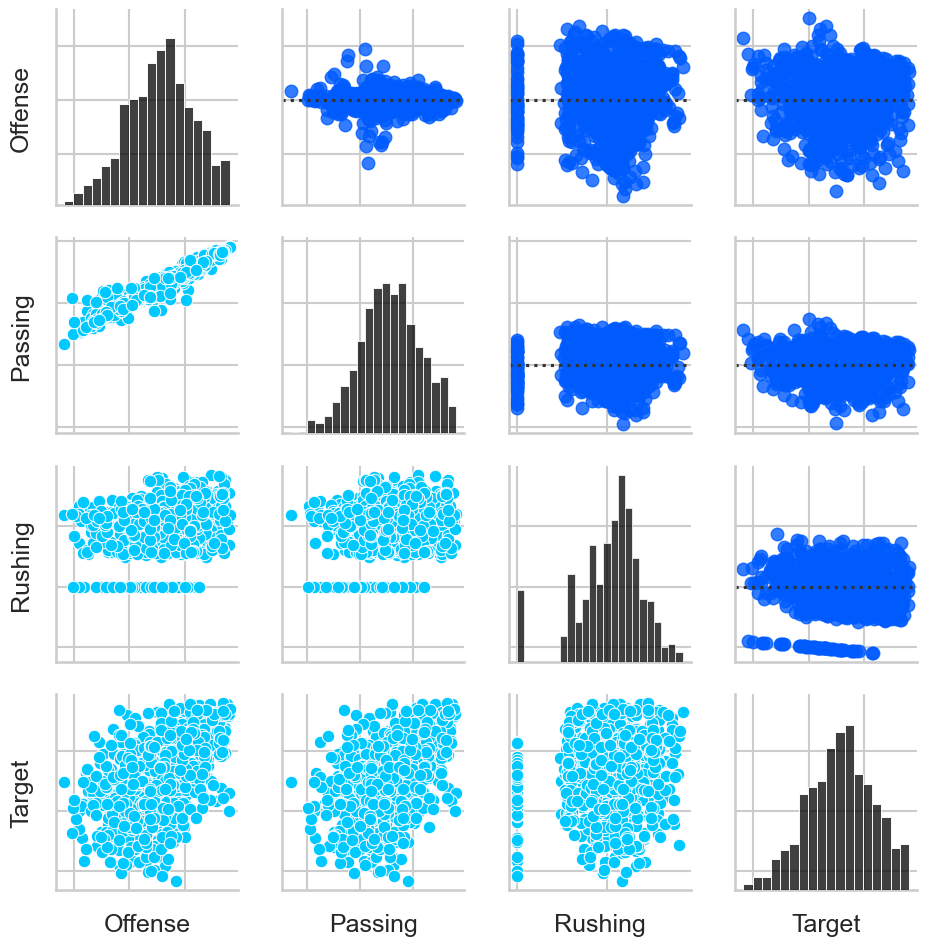

In [20]:
# rename columns for the plot
df_rename = df.rename(columns={
    'pass_grades_offense': 'Offense',
    'pass_grades_pass': 'Passing',
    'rush_grades_run': 'Rushing',
    'target': 'Target'
})

# create pairplot
g = sns.PairGrid(df_rename[['Offense', 'Passing', 'Rushing', 'Target']])

# map residual plot to upper triangle
g.map_upper(sns.residplot, color=chart_colors[1]) 

# map regression plot to the lower triangle
g.map_lower(sns.scatterplot, color=chart_colors[0])

# map histogram to the diagonal
g.map_diag(sns.histplot, color=chart_colors[4])

# remove tick labels
for ax in g.axes.flat: 
    ax.set_xticklabels([])
    ax.set_yticklabels([]);

In [21]:
df[['pass_grades_offense', 'pass_grades_pass', 'rush_grades_run', 'target']].corr()

pass_grades_offense  pass_grades_pass  rush_grades_run  \
pass_grades_offense             1.000000          0.968256         0.225109   
pass_grades_pass                0.968256          1.000000         0.108751   
rush_grades_run                 0.225109          0.108751         1.000000   
target                          0.502098          0.487626         0.138310   

                       target  
pass_grades_offense  0.502098  
pass_grades_pass     0.487626  
rush_grades_run      0.138310  
target               1.000000

__Grade correlations within a season:__
- Passing grade correlates very strongly with a QB's overall offensive grade (0.97 correlation).
- Rush grade has a much smaller correlation with offensive grade at 0.23. Rush grade correlates even less with passing grade at an anemic 0.11 correlation.
- This makes sense, as the quarterback position is primarily responsible for passing the football. Although rushing QBs have become more standard in today's league, a QB's ability to pass the football effictively and consistently has a much greater impact on their offensive performance than their rushing capabilities.

__Grade correlations with target var:__
- Both offensive and passing grades of the previous season correlate moderately with the following season's offensive grade, both around a 0.5 correlation.
- Once again, rush grade seems to be a much worse predictor of overall offensive performance, only correlating with the target var at 0.14.

# Feature correlation
- Find strongest corrs to target variable to produce feature subsets to train models on.

In [22]:
# drop player name
no_player = df.drop(['player', 'team_name'], axis=1)

In [23]:
# corr matrix of target column, drop target row
corr = no_player.corr()[['target']].drop('target', axis=0)

# sort vals, lowest corrs on left, largest on right
corr.sort_values('target').T

pass_pressure_to_sack_rate  pass_sack_percent  pass_twp_rate  \
target                   -0.148795          -0.137868      -0.121418   

        rush_elusive_rating  pass_drop_rate  rolling_std  rush_elu_recv_mtf  \
target            -0.040798       -0.010355    -0.003936           0.009335   

        pass_avg_depth_of_target  rush_yco_attempt  rush_ypa  \
target                  0.010766          0.018314  0.034515   

        pass_avg_time_to_throw  pass_grades_hands_fumble  \
target                0.047513                    0.0814   

        rush_breakaway_percent  rush_grades_offense_penalty      year  \
target                 0.08738                     0.088902  0.100315   

        rush_gap_attempts  rush_designed_yards  rush_elu_rush_mtf  \
target           0.103268             0.127706           0.131145   

        rush_breakaway_yards  rush_grades_run  rush_elu_yco  \
target              0.137395          0.13831      0.140969   

        rush_breakaway_attempts  rush_avoided_tackles  pass_btt_rate  \
target                 0.146513              0.173166       0.173596   

        rush_zone_attempts  rush_yards_after_contact  pass_completion_percent  \
target            0.186905                  0.190662                 0.195441   

        pass_ypa  pass_accuracy_percent       exp  rush_longest  \
target  0.206052               0.208437  0.220786      0.222908   

        rush_explosive  rush_yards  rush_touchdowns  rush_scramble_yards  \
target        0.226555    0.227597         0.246517              0.24658   

        pass_scrambles  pass_spikes  rush_first_downs  pass_bats  \
target        0.269002     0.270201          0.287474   0.314875   

        pass_turnover_worthy_plays  pass_interceptions  pass_hit_as_threw  \
target                     0.31656            0.317987           0.318205   

        pass_qb_rating  rush_fumbles  rush_attempts  rush_total_touches  \
target          0.3201      0.324389       0.334201            0.334842   

        pass_penalties  pass_sacks  pass_thrown_aways  pass_yds_gm  \
target        0.343141    0.376471           0.423298     0.434114   

        pass_drops  pass_def_gen_pressures  pass_tds_gm  rush_run_plays  \
target    0.436208                0.457194       0.4654        0.471925   

        player_game_count  pass_dropbacks  pass_passing_snaps  \
target           0.474023        0.484991            0.486666   

        pass_grades_pass  pass_attempts  pass_aimed_passes  \
target          0.487626       0.489447            0.49016   

        pass_big_time_throws  pass_grades_offense  pass_completions  \
target              0.494656             0.502098          0.508426   

        pass_first_downs  pass_yards  rolling_mean  pass_touchdowns  
target          0.517432    0.518093      0.523356         0.535807

- Overall, no correlations were extremely negative. The most negative corr was pressure_to_sack_rate at -0.15. This describes QBs who have a poor time avoiding sacks when pressured, thus resulting in a lower offensive grade.
- Surprised that rolling_std has a correlation so close to 0. I thought that this engineered feature would have a very negative correlation, identifying QB inconsistency.
- Player experience has a surprising low corr at 0.22.
- Stats like thrown_aways, pass_drops, and def_gen_pressures have correlations above 0.4. Although these statistics are negative (QBs would prefer for these values to be low), higher values in these columns seem to correlate with a higher offensive grade. This is very likely a product of volume. Starting QBs in our dataset will have higher values for these columns, as they play more games. It's hard to tell if these columns will provide any actual insight in the modeling process.
- Not surprising that grades_pass, big_time_throws, grades_offense, yards, and touchdowns have high correlations (all around 0.5).
- Other than TDs, our engineered feature "rolling_mean" has the highest correlation to the target variable (at 0.52).
- pass_tds_gm and pass_yds_gm also has very high correlations, but still lower than the totals for tds and yards.

In [24]:
# only look at corrs with abs value greater than 0.3, fill rest of cells with NaN
filtered_corr = corr.where(corr.abs() > 0.3, np.nan)

# drop rows with null values
filtered_corr = filtered_corr.dropna(axis=0, how='all')

filtered_corr.shape

(29, 1)

In [25]:
filtered_corr.index

Index(['player_game_count', 'pass_aimed_passes', 'pass_attempts', 'pass_bats',
       'pass_big_time_throws', 'pass_completions', 'pass_def_gen_pressures',
       'pass_dropbacks', 'pass_drops', 'pass_first_downs',
       'pass_grades_offense', 'pass_grades_pass', 'pass_hit_as_threw',
       'pass_interceptions', 'pass_passing_snaps', 'pass_penalties',
       'pass_qb_rating', 'pass_sacks', 'pass_thrown_aways', 'pass_touchdowns',
       'pass_turnover_worthy_plays', 'pass_yards', 'rush_attempts',
       'rush_fumbles', 'rush_run_plays', 'rush_total_touches', 'pass_tds_gm',
       'pass_yds_gm', 'rolling_mean'],
      dtype='object')

- The 29 cols above all have correlations above 0.3 with the target variable. This subset will be one of the feature subsets that the model is trained on.
- Now, let's get into the [modeling process](./models_1.ipynb) to predict future QB performance!